In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

%matplotlib inline
plt.style.use('seaborn')

# Для GridSearch
from sklearn.model_selection import GridSearchCV

# Для RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

# Для Hyperopt
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials

# Для Optuna
import optuna

In [2]:
data = pd.read_csv('data/_train_sem09.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Создаем матрицу наблюдений X и вектор ответов y
X = data.drop(['Activity'], axis=1)
y = data['Activity']

<AxesSubplot:xlabel='Activity', ylabel='count'>

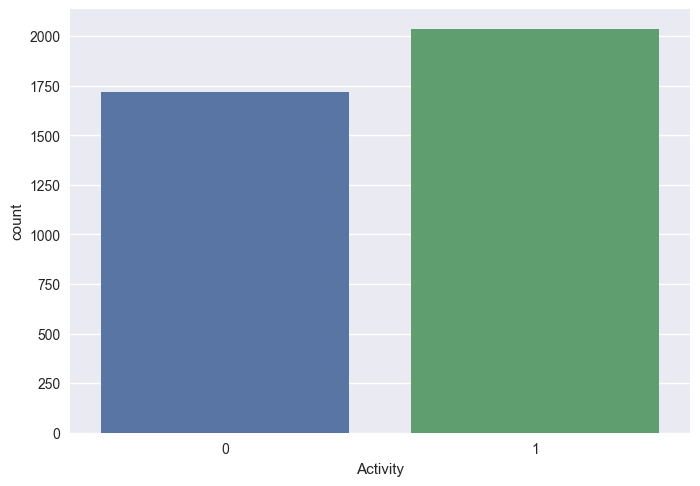

In [4]:
# Оценим соотношение классов ответа в представленном датасете
sns.countplot(data=data, x='Activity')

In [5]:
# Классы ответа в датасете распределены неравномерно, применем стратификацию
# Разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size = 0.2)

In [6]:
# зафиксируем random_state
random_state = 42

1. Логистическая регрессия

In [7]:
max_iter = 200

In [8]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(random_state=random_state, max_iter = max_iter)
#Обучаем модель
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = log_reg.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на обучающем наборе: 0.89
f1_score на тестовом наборе: 0.78


/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Воспользуемся методом GridSeachCV
param_grid = {'penalty': ['l1', 'l2'], # тип регуляризации
              'solver': ['liblinear', 'saga'], # алгоритм оптимизации
              'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1] # уровень силы регурялизации
              }
grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(random_state=random_state, max_iter=max_iter), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  

%time 
grid_search.fit(X_train, y_train)

y_train_pred = grid_search.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 10 µs


/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-pack

f1_score на обучающем наборе: 0.85
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [10]:
# Воспользуемся методом RandomizedSearchCV
param_distributions = {'penalty': ['l1', 'l2'],
                       'solver': ['liblinear', 'saga'],
                       'C': list(np.linspace(0.01, 1, 10, dtype=float))
                       }
            
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(random_state=random_state, max_iter=max_iter), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 40, 
    n_jobs = -1
)

%time 
random_search.fit(X_train, y_train)

y_train_pred = random_search.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = random_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 45.1 µs


/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-pack

f1_score на обучающем наборе: 0.82
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.23}


In [11]:
# Воспользуемся методом Hyperopt

# зададим пространство поиска гиперпараметров
space={'penalty': hp.choice('penalty',['l1', 'l2']), # тип регуляризации
       'solver': hp.choice('solver', ['liblinear', 'saga']), # алгоритм оптимизации
       'C': hp.choice('C', [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]) # уровень силы регурялизации
}
              
def hyperopt_lr(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    
    # функция получает комбинацию гиперпараметров в "params"
    params = {'penalty': params['penalty'], 
              'solver': params['solver'], 
              'C': params['C']
              }
  
    # используем эту комбинацию для построения модели
    model = linear_model.LogisticRegression(**params, random_state=42, max_iter=500)

    # обучаем модель
    model.fit(X, y)
    
    # обучим модель с помощью кросс-валидации с тем же количеством фолдов
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

# начинаем подбор гиперпараметров
%time

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_lr, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=20, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )

best_param = hyperopt.space_eval(space, best)

print("Наилучшие значения гиперпараметров {}".format(best_param))

# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(
    random_state=random_state, 
    max_iter=max_iter,
    penalty=best_param['penalty'],
    solver=best_param['solver'],
    C=best_param['C']
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 31 µs
  5%|▌         | 1/20 [00:03<01:08,  3.59s/trial, best loss: -0.7705588887308898]

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 10%|█         | 2/20 [02:21<24:43, 82.42s/trial, best loss: -0.7797008841529014]

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 45%|████▌     | 9/20 [04:17<03:22, 18.41s/trial, best loss: -0.7797008841529014]

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 50%|█████     | 10/20 [06:53<10:09, 60.97s/trial, best loss: -0.7797008841529014]

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 65%|██████▌   | 13/20 [08:19<04:30, 38.61s/trial, best loss: -0.7817633488644076]

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 70%|███████   | 14/20 [11:42<08:50, 88.37s/trial, best loss: -0.7817633488644076]

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 80%|████████  | 16/20 [11:52<03:02, 45.70s/trial, best loss: -0.7817633488644076]

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 85%|████████▌ | 17/20 [13:58<03:28, 69.56s/trial, best loss: -0.7817633488644076]

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramil/opt/anaconda3/lib/python3.9/site-pac

100%|██████████| 20/20 [18:13<00:00, 54.70s/trial, best loss: -0.7817633488644076]
Наилучшие значения гиперпараметров {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
f1_score на обучающем наборе: 0.85
f1_score на тестовом наборе: 0.79


/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
# Воспользуемся методом Optuna

def optuna_lr(trial):
  # задаем пространства поиска гиперпараметров
  penalty = trial.suggest_categorical('penalty',['l2', 'l1']) # тип регуляризации
  solver = trial.suggest_categorical('solver', ['liblinear', 'saga']) # алгоритм оптимизации
  C = trial.suggest_categorical('C', [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]) # уровень силы регурялизации

  # создаем модель
  model = linear_model.LogisticRegression(random_state=random_state, 
                                          max_iter=max_iter,
                                          penalty=penalty,
                                          solver=solver,
                                          C=C)
  
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score

%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="LogisticRegression", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_lr, n_trials=40)

# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))

print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(**study.best_params, max_iter=max_iter, random_state=random_state)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

[I 2022-10-10 00:33:51,387] A new study created in memory with name: LogisticRegression


CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 28.8 µs


/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2022-10-10 00:34:09,154] Trial 0 finished with value: 0.8269812462189957 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.3}. Best is trial 0 with value: 0.8269812462189957.
[I 2022-10-10 00:34:09,854] Trial 1 finished with value: 0.8675213675213675 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.3}. Best is trial 1 with value: 0.8675213675213675.
/Users/ramil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2022-10-10 00:34:22,972] Trial 2 finished with value: 0.8745410036719705 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.7}. Best is trial 2 with value: 0.8745410036719705.
[I 2022-10-10 00:34:23,495] Trial 3 finished with valu

Наилучшие значения гиперпараметров {'penalty': 'l2', 'solver': 'liblinear', 'C': 1}
f1_score на обучающем наборе: 0.89
f1_score на тестовом наборе: 0.78


2. Cлучайный лес

In [13]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X_train, y_train)

#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('f1_score на обучающем наборе:: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на обучающем наборе:: 1.00
f1_score на тестовом наборе: 0.81


In [14]:
# Воспользуемся методом GridSeachCV
param_grid = {'n_estimators': list(range(80, 200, 20)),
              'min_samples_leaf': [1, 5, 10],
              'max_depth': list(np.linspace(10, 40, 5, dtype=int))
              }
            
grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=random_state), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  

%time 
grid_search_forest.fit(X_train, y_train) 

y_train_pred = grid_search_forest.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = grid_search_forest.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

print("Наилучшие значения гиперпараметров: {}".format(grid_search_forest.best_params_))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 28.8 µs
f1_score на обучающем наборе: 1.00
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 120}


In [15]:
# Воспользуемся методом RandomizedSearchCV
param_distributions = {'n_estimators': list(range(80, 200, 20)),
                       'min_samples_leaf': [1, 5, 10],
                       'max_depth': list(np.linspace(10, 40, 5, dtype=int))
                       }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=random_state), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 50, 
    n_jobs = -1
)  

%time 
random_search_forest.fit(X_train, y_train) 

y_train_pred = random_search_forest.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = random_search_forest.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

print("Наилучшие значения гиперпараметров: {}".format(random_search_forest.best_params_))

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 32.9 µs
f1_score на обучающем наборе: 1.00
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'n_estimators': 120, 'min_samples_leaf': 1, 'max_depth': 25}


In [16]:
# Воспользуемся методом Hyperopt

# зададим пространство поиска гиперпараметров
space={'n_estimators': hp.quniform('n_estimators', 80, 200, 20),
       'max_depth' : hp.quniform('max_depth', 10, 40, 5),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1)
      }

def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)
    
    # обучаем модельс помощью кросс-валидации с тем же количеством фолдов
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

# начинаем подбор гиперпараметров
%time

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=20, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )

print("Наилучшие значения гиперпараметров {}".format(best))

# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(
    random_state=random_state, 
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_leaf=int(best['min_samples_leaf'])
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 31.9 µs
100%|██████████| 20/20 [02:29<00:00,  7.49s/trial, best loss: -0.8127685515568548]
Наилучшие значения гиперпараметров {'max_depth': 20.0, 'min_samples_leaf': 2.0, 'n_estimators': 140.0}
f1_score на обучающем наборе: 0.99
f1_score на тестовом наборе: 0.83


In [17]:
# Воспользуемся методом Optuna
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 80, 200, 20)
  max_depth = trial.suggest_int('max_depth', 10, 40, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  
  # обучаем модель
  model.fit(X_train, y_train)
  
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score

%time
# cоздаем объект исследования
# напрямую указываем, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=50)

# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))

print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

[I 2022-10-10 00:50:38,224] A new study created in memory with name: RandomForestClassifier


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 17.9 µs


[I 2022-10-10 00:50:41,479] Trial 0 finished with value: 0.9074809160305344 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9074809160305344.
[I 2022-10-10 00:50:44,470] Trial 1 finished with value: 0.9565749235474005 and parameters: {'n_estimators': 160, 'max_depth': 22, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9565749235474005.
[I 2022-10-10 00:50:46,970] Trial 2 finished with value: 0.9435803598658127 and parameters: {'n_estimators': 140, 'max_depth': 20, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9565749235474005.
[I 2022-10-10 00:50:50,295] Trial 3 finished with value: 0.9584097859327219 and parameters: {'n_estimators': 180, 'max_depth': 36, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.9584097859327219.
[I 2022-10-10 00:50:52,653] Trial 4 finished with value: 0.9761613691931541 and parameters: {'n_estimators': 120, 'max_depth': 40, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.976

Наилучшие значения гиперпараметров {'n_estimators': 180, 'max_depth': 25, 'min_samples_leaf': 1}
f1_score на обучающем наборе: 1.00
f1_score на тестовом наборе: 0.82
